In [2]:
import os
import cv2
import numpy as np
from imgaug import augmenters as iaa
from deepface import DeepFace
from matplotlib import pyplot as plt


In [6]:
# This script performs data augmentation on a set of images in a specified directory.
test_image_path = "facees.jpg"  #  test image
faces_db_path = "faces" # folder containing known faces

#DATA AUGMENTATION

augmented_dir = "augmented_faces"

augmentations = iaa.Sequential([
    iaa.Fliplr(0.5),  # horizontal flip
    iaa.Flipud(0.5),  # vertical flip
    iaa.Affine(rotate=(-45, 45)),  # rotate
    iaa.AdditiveGaussianNoise(scale=(0, 0.1*255)),  # add noise
    iaa.Multiply((0.5, 1.5)),  # change brightness
    iaa.GammaContrast((0.5, 2.0)),  # change contrast
    iaa.Crop(percent=(0, 0.1)),  # crop
])

def augment_and_save(img_path,person_name,save_dir,num_augments=10):
    filename = os.path.basename(img_path)
    person_name= os.path.basename(filename).split('_')[0]
    image= cv2.imread(img_path)
    if image is None:
        print(f"Error reading image {img_path}")
        return
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    person_folder = os.path.join(save_dir, person_name)
    os.makedirs(person_folder, exist_ok=True)
    images=[image]*num_augments
    augmented_images = augmentations(images=images)
       
    for i,aug_img in enumerate(augmented_images):
                filename = f"{person_name}_{i}.jpg"
                save_path = os.path.join(person_folder, filename)
                aug_img_bgr = cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR)
                cv2.imwrite(save_path, aug_img_bgr)
    print(f"Augmented images saved in {person_folder}")

    
for filename in os.listdir(faces_db_path):
    img_path = os.path.join(faces_db_path, filename)
    if os.path.isfile(img_path):
        augment_and_save(img_path,filename,augmented_dir)

            
 

Augmented images saved in augmented_faces\bolzyy
Augmented images saved in augmented_faces\bolzyy
Augmented images saved in augmented_faces\Grace
Augmented images saved in augmented_faces\Grace
Augmented images saved in augmented_faces\Loretta
Augmented images saved in augmented_faces\Steph
Augmented images saved in augmented_faces\wealth


3 face(s) detected in the test image.


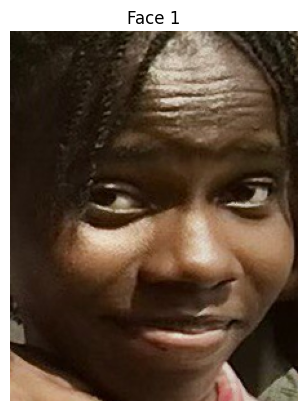

25-04-14 18:50:16 - Found 0 newly added image(s), 0 removed image(s), 50 replaced image(s).


Finding representations: 100%|██████████| 50/50 [02:47<00:00,  3.36s/it]


25-04-14 18:53:04 - There are now 51 representations in ds_model_arcface_detector_opencv_aligned_normalization_base_expand_0.pkl
25-04-14 18:53:04 - Searching temp_face_1.jpg in 51 length datastore
25-04-14 18:53:05 - find function duration 169.51324200630188 seconds
Matches for Face 1:
  - Grace: 2 match(es)
✅ Best match for Face 1: Grace


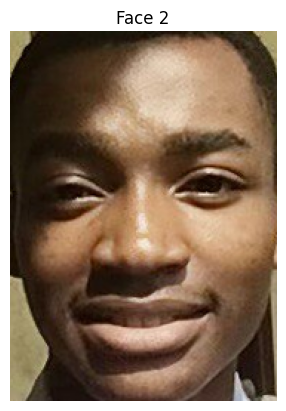

25-04-14 18:53:06 - Searching temp_face_2.jpg in 51 length datastore
25-04-14 18:53:07 - find function duration 0.9509828090667725 seconds
Matches for Face 2:
  - wealth: 3 match(es)
✅ Best match for Face 2: wealth


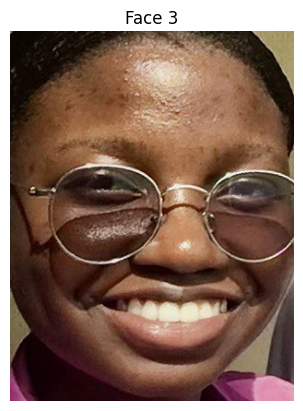

25-04-14 18:53:17 - Searching temp_face_3.jpg in 51 length datastore
25-04-14 18:53:18 - find function duration 0.9905192852020264 seconds
Matches for Face 3:
  - bolzyy: 3 match(es)
  - Loretta: 1 match(es)
  - wealth: 1 match(es)
✅ Best match for Face 3: bolzyy


In [7]:
test_image_path = "facees.jpg"

faces = DeepFace.extract_faces(img_path=test_image_path, detector_backend="retinaface", enforce_detection=False)

if len(faces) == 0:
    print("No faces detected in the test image.")
else:
    print(f"{len(faces)} face(s) detected in the test image.")

image_bgr = cv2.imread(test_image_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Iterate over each detected face
for idx, face_info in enumerate(faces):
    face = face_info["face"]
 
   
    if face.dtype == np.float32 or face.dtype == np.float64:
        face_uint8 = (face * 255).clip(0, 255).astype(np.uint8)
    else:
        face_uint8 = face

    # Save each detected face temporarily
    face_path = f"temp_face_{idx + 1}.jpg"
    cv2.imwrite(face_path, cv2.cvtColor(face_uint8, cv2.COLOR_RGB2BGR))

    # Display the face
    plt.imshow(face)
    plt.title(f"Face {idx + 1}")
    plt.axis('off')
    plt.show()

    # Perform face matching with the augmented images
    try:
        results = DeepFace.find(
            img_path=face_path,
            db_path=augmented_dir,
            model_name="ArcFace",
            distance_metric='cosine',
            enforce_detection=False
        )

        if results and not results[0].empty:
            print(f"Matches for Face {idx + 1}:")

            match_counts = {}  # Dictionary to store match frequency

            for _, row in results[0].iterrows():
                matched_path = row["identity"]
                # Extract folder name (i.e., person name)
                person_name = os.path.basename(matched_path).split('_')[0]
                match_counts[person_name] = match_counts.get(person_name, 0) + 1

            # Print all matches grouped
            for name, count in match_counts.items():
                print(f"  - {name}: {count} match(es)")

            # Find best match
            best_match = max(match_counts, key=match_counts.get)
            print(f"✅ Best match for Face {idx + 1}: {best_match}")
    except:
        print("No match found")
    os.remove(face_path)


  # Convert BGR to RGB for display



In [ ]:
# for idx, face_info in enumerate(faces):
#     try:
#         results = DeepFace.find(
#             img_path=face_path,
#             db_path=augmented_dir,
#             model_name="ArcFace",
#             distance_metric='cosine',
#             enforce_detection=False
#         )

#         if results and not results[0].empty:
#             print(f"Matches for Face {idx + 1}:")

#             # Iterate through all matches
#             for _, row in results[0].iterrows():
#                 matched_identity = row["identity"]
#                 matched_name = os.path.splitext(os.path.basename(matched_identity))[0]
#                 print(f"  - Matched with: {matched_name}")

#                 # Draw rectangle & label on original image
#                 cv2.rectangle(face_uint8, (x, y), (x + w, y + h), (0, 255, 0), 2)
#                 cv2.putText(face_uint8, matched_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

#         else:
#             print(f"Face {idx + 1} not matched with any image in the database.")

#     except Exception as e:
#         print(f"Error in face matching: {e}")

#     # Remove temp face image
    

#     # Show updated image
#     image_bgr = cv2.imread(test_image_path)
#     image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
#     plt.imshow(image_rgb)
#     plt.title("Identified Faces")
#     plt.axis("off")
#     plt.show()


25-04-09 06:53:33 - Found 27 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations:  63%|██████▎   | 17/27 [20:09<12:23, 74.39s/it]